In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.regularizers import l2


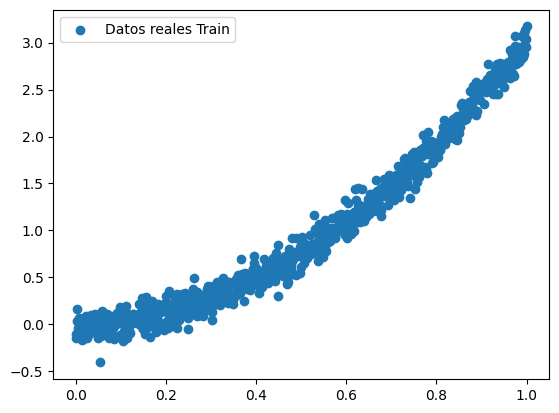

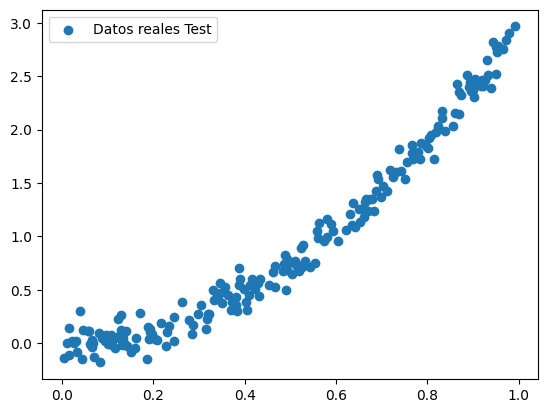

In [ ]:
# Generar datos de ejemplo para regresión
X = np.linspace(0, 1, 1000)
y = 3 * X**2 + 0.1 * np.random.randn(1000)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train, y_train, label='Datos reales Train')
plt.legend()
plt.show()

plt.scatter(X_test, y_test, label='Datos reales Test')
plt.legend()
plt.show()


In [ ]:
# Crear el modelo de red neuronal
model = Sequential()

# Capa de entrada
model.add(Dense(10, input_dim=1, activation='relu'))
# Capas intermedias
model.add(Dense(256, activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
# Capa de salida
model.add(Dense(1,activation='linear'))

In [ ]:
# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 256)               2816      
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 134677 (526.08 KB)
Trainable params: 134677 (526.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# Entrenar el modelo
history = model.fit(X_train,y_train, epochs=1000, batch_size=32, validation_split = 0.2,verbose = 0)




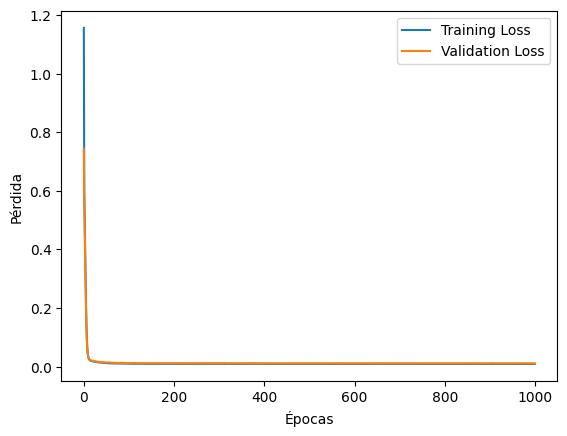

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()


In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 6ms/step


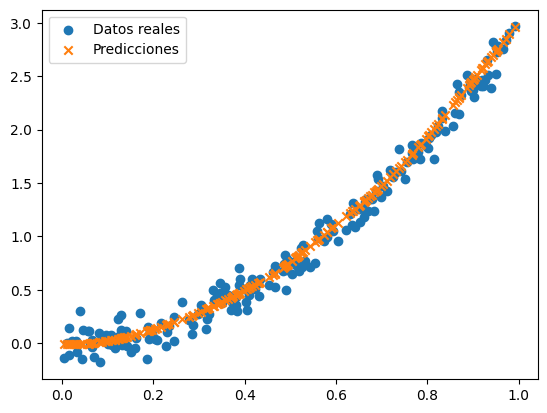

In [ ]:


plt.scatter(X_test, y_test, label='Datos reales')
plt.scatter(X_test, y_pred, label='Predicciones', marker='x')
plt.legend()
plt.show()

In [ ]:
# Generar datos de ejemplo para otra regresión
X_new = np.linspace(0, 1, 200)
y_new = 3 * X_new**2 + 0.7 * np.random.randn(200)

In [ ]:
# Crear el modelo de red neuronal
model = Sequential()

# Capa de entrada
model.add(Dense(10, input_dim=1, activation='relu'))
# Capas intermedias
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
# Capa de salida
model.add(Dense(1,activation='linear',kernel_regularizer=l2(0.01)))

In [ ]:
# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 256)               2816      
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:

# Entrenar el modelo
history = model.fit(X_train,y_train, epochs=1000, batch_size=32, validation_split = 0.2,verbose = 0)




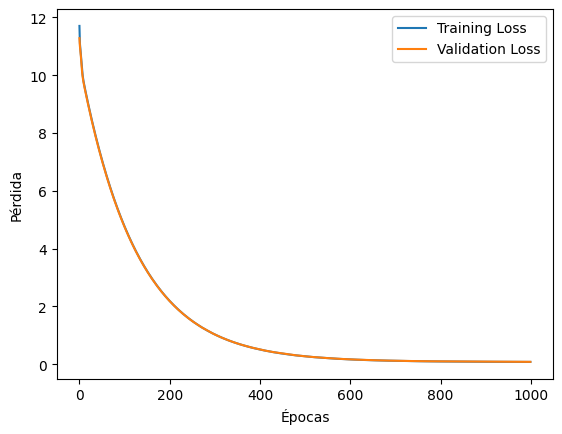

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()



In [ ]:
y_pred_1 = model.predict(X_new)

7/7 [==============================] - 0s 2ms/step


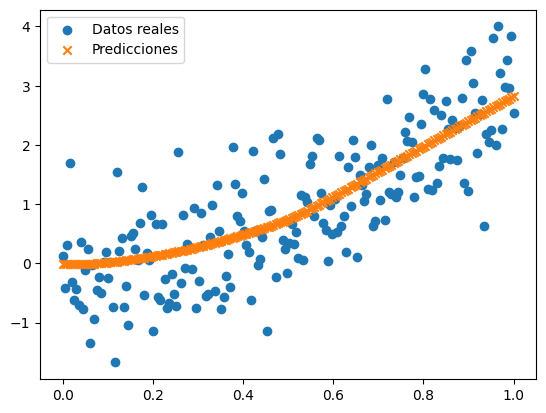

In [ ]:
plt.scatter(X_new, y_new, label='Datos reales')
plt.scatter(X_new, y_pred_1, label='Predicciones', marker='x')
plt.legend()
plt.show()